<a href="https://colab.research.google.com/github/ezair/Iris-Species-Classification/blob/master/iris_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying the species of Iris Flower.

In [1354]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [1355]:
# Let's get a dataset that contains features representing an iris flower.
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [1356]:
# Here each number represents a different class or species of iris that we will be predicting.
print(iris_dataset['target'])
print(f"Target names: {iris_dataset['target_names']}")

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
Target names: ['setosa' 'versicolor' 'virginica']


In [1357]:
# List of our features.
print(f"Feature names:\n\t{iris_dataset['feature_names']}")

Feature names:
	['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [1358]:
# Let's see what the data looks like.
print(f"First 6 rows:\n{iris_dataset['data'][: 6]}")

First 6 rows:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]]


In [1359]:
# X is is our feature matrix.
X = iris_dataset['data']

# y is our target vector (that we want to predict).
y = iris_dataset['target']

### Classification Using KNN

In [1360]:
# Okay, let's split the data up.
# 80 Percent for training, 20 percent for testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [1361]:
# Let's see how many records we have to test on.
# 30 does not seem to be a lot to test on, let's change the split a tad. We should hav more testing data.
print(len(X_test))

30


In [1362]:
# This is still not a ton of data, but we can make due with it.
# NOTE: The data is split randomly. This ensures that we do not get the same exact testing and training set everytime. We want to use random sampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)
print(len(X_test))

38


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9921f8a7b8>,
      dtype=object)

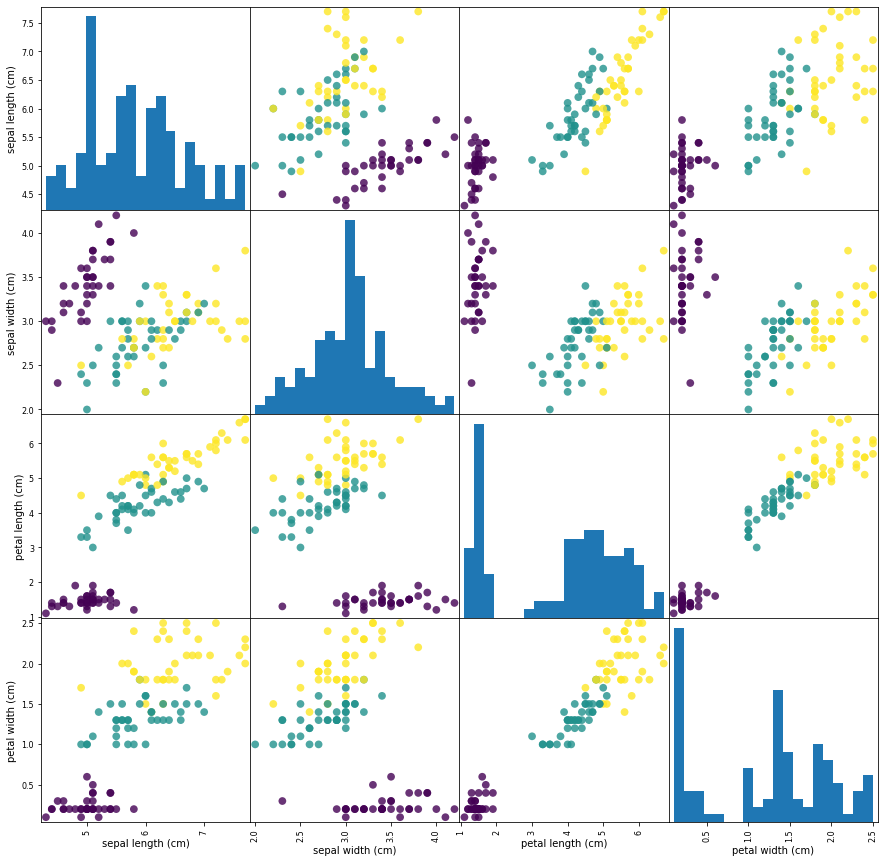

In [1363]:
# Let's take a look at the data in front of us and see if we can make any inferences.
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15, 15),
 marker='o', hist_kwds={'bins': 20}, s=60,
 alpha=.8)

In [1364]:
# Data looks rather spread and distinct. We will use KNN to classify our X feature vector and map to our y data value.
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [1365]:
# Let's fit this model to our training data and see what our results are.
model = knn.fit(X_train, y_train)
model.score(X_train, y_train)

#...Shocking that our training fit scores 100 percent.

1.0

In [1366]:
# Sure we fit 100 percent on the training data, but what about on the testing data?
model.score(X_test, y_test)

# This is a better socre then expected, but we are not quite at 100 percent accuracy? What is being miscalculated? Are we overfitting / underfitting the data?
# Is the data so parse that it needs to be normalized?

1.0

In [1367]:
# Let's make some predictions on new data that we are just now coming up with.
X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = model.predict(X_new)
print(f"Prediction: {prediction}")
print(f"Predicted target name: {iris_dataset['target_names'][prediction]}")

Prediction: [0]
Predicted target name: ['setosa']


In [1368]:
print(f'Entire data set: {iris_dataframe}')

Entire data set:      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.0               3.6                1.4               0.2
1                  5.2               4.1                1.5               0.1
2                  5.8               2.7                5.1               1.9
3                  6.0               3.4                4.5               1.6
4                  6.7               3.1                4.7               1.5
..                 ...               ...                ...               ...
107                6.1               2.8                4.0               1.3
108                4.9               2.5                4.5               1.7
109                5.8               4.0                1.2               0.2
110                5.8               2.6                4.0               1.2
111                7.1               3.0                5.9               2.1

[112 rows x 4 columns]


### Classification Using a NN

In [1369]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Need to convert data into integer based data via one hot encoding.
# Swap number with corresponding target value string.
y = pd.DataFrame({'target': [str(value) for value in iris_dataset['target']]})
y['target'] = y['target'].replace([str(i) for i in range(len(iris_dataset['target_names']))], iris_dataset['target_names'])

# Run One hot encoding now...
y = pd.get_dummies(y, drop_first=False)

# Alright, now y should be good to pass to the NN that we will create...
print(y)

     target_setosa  target_versicolor  target_virginica
0                1                  0                 0
1                1                  0                 0
2                1                  0                 0
3                1                  0                 0
4                1                  0                 0
..             ...                ...               ...
145              0                  0                 1
146              0                  0                 1
147              0                  0                 1
148              0                  0                 1
149              0                  0                 1

[150 rows x 3 columns]


In [1370]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense

In [1371]:
import tensorflow as tf

# This will ensure that keras always uses the same random indexing and ensures we will always get the same value on training and testing with the same code.
np.random.seed(42)
tf.random.set_seed(42)

In [1372]:
# Let's start with one hidden layer.
# Our input will be the number of features our X Matrix has.
# Our output layer will contain m nodes, where m is the number of different Iris Species.
# For the number of neurons in the hidden layer we will use a genearlly valid formula, (num_of_inputs / 3) + num_of_outputs
# Minimization algorithm will be adam.
# Loss function will be cross entrophy.
# Output layer will use the softmax activation function, as we are doing classification.
def build_nn_model_1():
  # Define size for layers.
  input_size = X.shape[1]
  output_size = len(iris_dataset['target_names'])
  hidden_size = round(input_size / 3 + output_size)

  # Add layers and produce network.
  model = Sequential()
  model.add(Dense(hidden_size, input_dim=input_size, activation='relu'))
  model.add(Dense(hidden_size, activation='relu'))
  model.add(Dense(output_size, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

In [1373]:
# Just to be safe, we will use a high number of epochs and a moderately large number for our batch size.
epochs = 130
batch_size = 10

In [1374]:
# Standardize X feature matrix.
# Perhaps this will allow us to lower our number of epochs...?
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(iris_dataset['data'])

print(f"Standard Deviation: {X.std(axis=0)}")
print(f"Mean: {X.mean(axis=0)}")

Standard Deviation: [1. 1. 1. 1.]
Mean: [-1.69031455e-15 -1.84297022e-15 -1.69864123e-15 -1.40924309e-15]


In [1375]:
# Train model.
nn_model_1 = build_nn_model_1()

# NOTELL: We have not ran standardization on x, so let's see what happens...
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.25)

In [1376]:
nn_model_1.summary()

Model: "sequential_60"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_187 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_188 (Dense)            (None, 4)                 20        
_________________________________________________________________
dense_189 (Dense)            (None, 3)                 15        
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


In [1377]:
nn_model_1.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/130
12/12 [==============================] - 0s 1ms/step - loss: 1.1987 - accuracy: 0.1875
Epoch 2/130
12/12 [==============================] - 0s 910us/step - loss: 1.1717 - accuracy: 0.2143
Epoch 3/130
12/12 [==============================] - 0s 1ms/step - loss: 1.1465 - accuracy: 0.2321
Epoch 4/130
12/12 [==============================] - 0s 965us/step - loss: 1.1212 - accuracy: 0.2411
Epoch 5/130
12/12 [==============================] - 0s 1ms/step - loss: 1.0958 - accuracy: 0.2768
Epoch 6/130
12/12 [==============================] - 0s 878us/step - loss: 1.0693 - accuracy: 0.3214
Epoch 7/130
12/12 [==============================] - 0s 881us/step - loss: 1.0446 - accuracy: 0.3304
Epoch 8/130
12/12 [==============================] - 0s 1ms/step - loss: 1.0177 - accuracy: 0.3393
Epoch 9/130
12/12 [==============================] - 0s 927us/step - loss: 0.9917 - accuracy: 0.3929
Epoch 10/130
12/12 [==============================] - 0s 1ms/step - loss: 0.9659 - accuracy: 0.4643

In [1378]:
loss, accuracy = nn_model_1.evaluate(X_train, y_train)

print(f'Loss: {loss}')
print(f'Accuracy:  {accuracy}')

4/4 [==============================] - 0s 2ms/step - loss: 0.1579 - accuracy: 0.9643
Loss: 0.15792131423950195
Accuracy:  0.9642857313156128


In [1379]:
loss, accuracy = nn_model_1.evaluate(X_test, y_test)

print(f'Loss: {loss}')
print(f'Accuracy:  {accuracy}')

2/2 [==============================] - 0s 3ms/step - loss: 0.1060 - accuracy: 1.0000
Loss: 0.10599477589130402
Accuracy:  1.0
